In [1]:
%matplotlib notebook
import pandas as pd
from preprocess import Audio_Processor
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D

Using TensorFlow backend.


Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.


In [2]:
# Able to specify which GPU to use
os.environ["CUDA_VISIBLE_DEVICES"]="1"

SR = 16000
blocksize = int(SR/2)
overlap = int(SR/4)

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Setup

In [4]:
path_to_db='../ESC-50/'
ps = Audio_Processor(path_to_db + 'audio/')
dataset = pd.read_csv(path_to_db + 'meta/esc50.csv')

In [5]:
mapping = {'dog': 0,'rooster': 0,'pig': 0,'cow': 0,'frog': 0,'cat': 0,'hen': 0,
            'insects': 0,'sheep': 0,'crow': 0,'rain': 1,'sea_waves': 1,'crackling_fire': 1,
            'crickets': 0,'chirping_birds': 0,'water_drops': 1,'wind': 1,'pouring_water': 1,
            'toilet_flush': 1,'thunderstorm': 1,'crying_baby': 0,'sneezing': 0,'clapping': 0,
            'breathing': 0,'coughing': 0,'footsteps': 1,'laughing': 0,'brushing_teeth': 1,
            'snoring': 0,'drinking_sipping': 1,'door_wood_knock': 1,'mouse_click': 1,
            'keyboard_typing': 1,'door_wood_creaks': 1,'can_opening': 1,'washing_machine': 1,
            'vacuum_cleaner': 1,'clock_alarm': 1,'clock_tick': 1,'glass_breaking':1,'helicopter': 1,
            'chainsaw': 1,'siren': 1,'car_horn': 1,'engine': 1,'train': 1,'church_bells': 1,
            'airplane': 1,'fireworks': 1,'hand_saw': 1,
            }
dataset['h_target'] = None
classes = [None] * 50
for index, row in dataset.iterrows():
    target = row['target']
    classes[target] = row['category']
    dataset.loc[index, 'h_target'] = mapping[row['category']]

In [6]:
h_classes = ['Human & Animal', 'Interacting Materials']

## Getting Preprocessed Data
We allow for previously preprocessed data to be retrieved for faster training turnaround. If the fold has been preprocessed, it is loaded but if not it is processed and saved.

In [7]:
df = ps.preprocess_fold(dataset, 
                        kind='mfcc', 
                        fld=None, 
                        blocksize=blocksize, 
                        overlap=overlap)

In [8]:
df.describe()

,mfcc_2_std,mfcc_2_mean,mfcc_2_noise,mfcc_3_std,mfcc_3_mean,mfcc_3_noise,mfcc_4_std,mfcc_4_mean,mfcc_4_noise,mfcc_5_std,...,sflat_noise,sroll_std,sroll_mean,sroll_noise,rmse_std,rmse_mean,rmse_noise,h_target,target,fold
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,72.507501,45.017416,37.385395,32.282586,29.288099,29.037299,28.624832,28.652316,28.255287,27.680432,...,-0.019696,-0.020280,14.121078,25.642969,5.110945,22.803641,4.728321,0.64000,24.500000,3.000000
std,22.429185,13.749270,13.990447,12.482451,12.844946,13.193927,13.244052,13.745964,13.744182,13.444088,...,0.089549,0.087767,17.305620,21.175693,8.236620,11.064539,2.151362,0.48012,14.434479,1.414567
min,0.467220,0.753611,1.282752,1.074155,0.907809,1.276880,0.428470,0.633548,0.846962,0.617773,...,-0.519763,-0.484627,4.764953,11.652139,1.998343,7.152852,0.541668,0.00000,0.000000,1.000000
25%,56.616318,35.282913,26.778110,21.631800,17.349314,16.378429,15.822052,14.926780,14.737826,13.820180,...,-0.071463,-0.073589,10.407418,19.937195,3.772418,17.130730,3.134890,0.00000,12.000000,2.000000
50%,72.159225,44.696267,35.244943,31.169037,29.073932,28.958849,29.090751,29.458454,29.727010,29.389315,...,-0.014375,-0.014034,12.773370,23.508346,4.645349,20.725994,4.524411,1.00000,24.500000,3.000000
75%,87.413906,54.137569,46.248867,41.829136,39.997071,40.208394,39.942740,39.787000,39.563445,39.231914,...,0.034963,0.034582,15.856162,28.285405,5.564719,25.669332,6.069126,1.00000,37.000000,4.000000
max,199.820669,106.418461,91.874706,75.098603,72.087316,74.091721,83.406522,92.924575,103.945276,102.208297,...,0.456353,0.419580,753.679121,897.018995,361.159924,337.308704,17.336297,1.00000,49.000000,5.000000


In [9]:
df_samp = df.sample(1000)
df_samp.head()

,mfcc_2_std,mfcc_2_mean,mfcc_2_noise,mfcc_3_std,mfcc_3_mean,mfcc_3_noise,mfcc_4_std,mfcc_4_mean,mfcc_4_noise,mfcc_5_std,...,sflat_noise,sroll_std,sroll_mean,sroll_noise,rmse_std,rmse_mean,rmse_noise,h_target,target,fold
1505,49.576985,27.978500,21.078291,16.451194,13.494867,14.096851,11.187217,11.170985,9.618172,8.930247,...,0.005238,-0.058377,16.281564,30.868886,10.811988,33.122143,6.507168,0,28,4
1235,68.656710,32.077331,26.654441,22.679498,17.342130,16.308713,17.117415,17.448123,17.426159,16.908096,...,0.012067,0.046274,10.551973,27.073711,3.441706,18.527718,3.360709,0,7,4
1589,71.077261,34.939784,27.803322,17.240158,16.351941,12.029478,12.210921,13.077625,13.694505,13.206112,...,-0.050787,-0.078245,13.851809,24.259699,3.667169,22.840146,5.491145,0,20,4
1212,76.307518,32.311677,30.572117,17.215198,15.715325,21.778839,16.050004,13.567549,11.495306,16.871386,...,-0.032720,0.017561,15.928947,29.176478,6.468084,26.963236,5.102608,1,48,4
1495,110.320969,62.010015,57.914704,50.234315,43.249387,44.845607,44.288997,45.677844,48.275069,48.301933,...,-0.047639,0.050542,10.057210,19.126546,4.839150,15.440857,5.799457,1,44,4


In [10]:
X = df.drop(['target', 'h_target', 'fold'], axis=1)
y_h = pd.Series(df['h_target'])
y_l = pd.Series(df['target'])

In [11]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X.values), columns=X.columns)
X.head()

,mfcc_2_std,mfcc_2_mean,mfcc_2_noise,mfcc_3_std,mfcc_3_mean,mfcc_3_noise,mfcc_4_std,mfcc_4_mean,mfcc_4_noise,mfcc_5_std,...,sband_noise,sflat_std,sflat_mean,sflat_noise,sroll_std,sroll_mean,sroll_noise,rmse_std,rmse_mean,rmse_noise
0,0.145971,0.358000,0.241659,0.311018,0.188058,0.164762,0.112361,0.105905,0.093099,0.136718,...,0.138012,0.668099,0.199621,0.628461,0.265458,0.007793,0.009671,0.003802,0.032866,0.129780
1,0.273334,0.588058,0.463405,0.543999,0.623788,0.637511,0.608610,0.476442,0.489665,0.480908,...,0.517271,0.644286,0.506407,0.568646,0.579871,0.015438,0.009132,0.009245,0.049934,0.404170
2,0.401245,0.510012,0.624466,0.626445,0.603950,0.606666,0.523939,0.433208,0.389863,0.424412,...,0.491335,0.584962,0.562653,0.515774,0.666096,0.015277,0.012106,0.007107,0.043239,0.264639
3,0.370199,0.533236,0.582477,0.605202,0.614460,0.617079,0.479040,0.442856,0.404179,0.444656,...,0.512685,0.555342,0.514868,0.513224,0.554020,0.012918,0.013191,0.007389,0.038406,0.297578
4,0.364064,0.516165,0.587580,0.595946,0.571806,0.537272,0.466349,0.400790,0.374205,0.376965,...,0.636319,0.512443,0.563755,0.628842,0.488211,0.010563,0.008599,0.006710,0.036907,0.253877


# PCA

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X)

In [13]:
pca_2d = pca.transform(X)

<IPython.core.display.Javascript object>


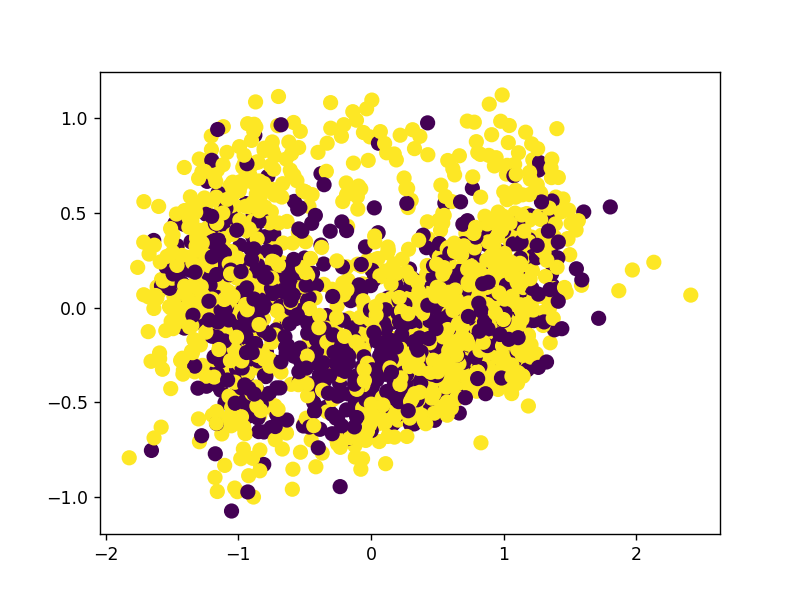

In [14]:
fig = plt.figure()
plt.scatter(pca_2d[:,0], pca_2d[:,1], c=y_h, s=60)
plt.show()

<IPython.core.display.Javascript object>


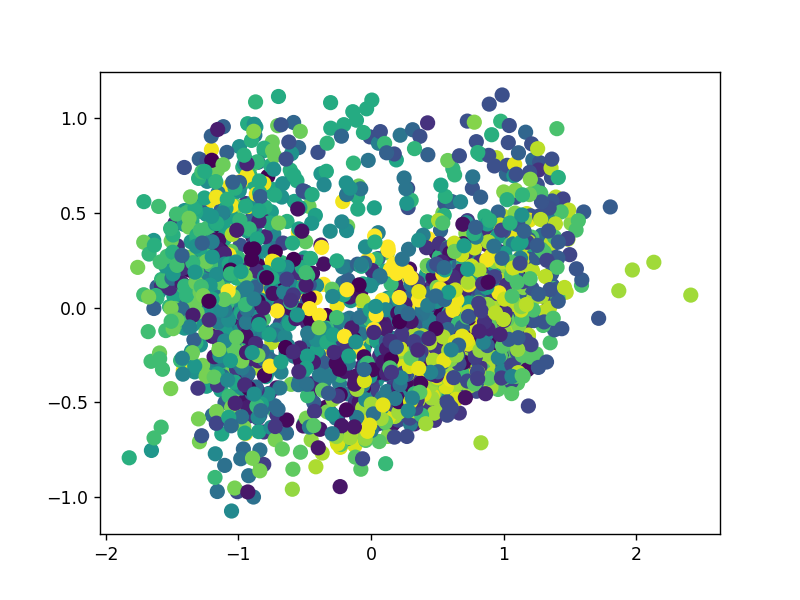

In [15]:
fig = plt.figure()
plt.scatter(pca_2d[:,0], pca_2d[:,1], c=y_l, s=60)
plt.show()

## Animal + Human

In [16]:
pca = PCA(n_components=2).fit(X[y_h == 1])
pca_2d = pca.transform(X[y_h == 1])

<IPython.core.display.Javascript object>


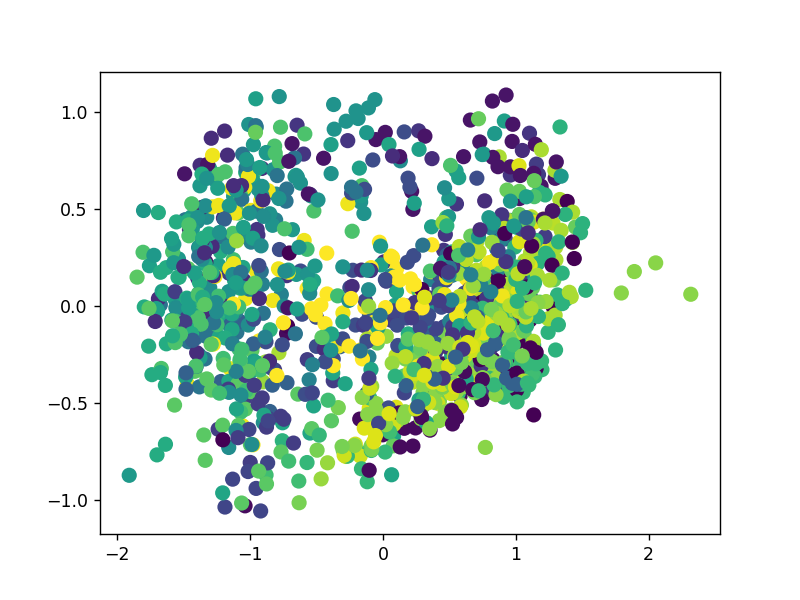

In [17]:
fig = plt.figure()
plt.scatter(pca_2d[:,0], pca_2d[:,1], c=y_l[y_h == 1].values, s=60)
plt.show()

## Interacting Elements

In [18]:
pca = PCA(n_components=2).fit(X[y_h == 0])
pca_2d = pca.transform(X[y_h == 0])

<IPython.core.display.Javascript object>


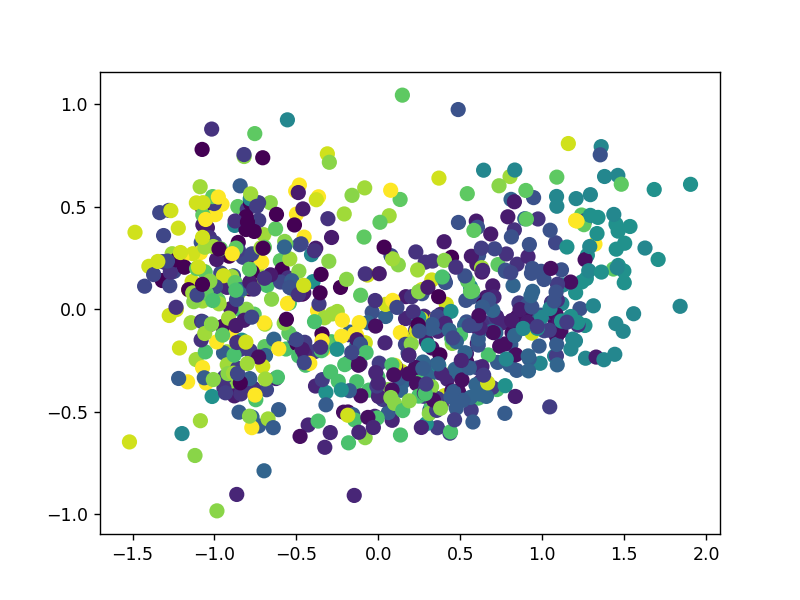

In [19]:
fig = plt.figure()
plt.scatter(pca_2d[:,0], pca_2d[:,1], c=y_l[y_h == 0].values, s=60)
plt.show()

# ICA

In [20]:
from sklearn.decomposition import FastICA as ICA
ica = ICA(n_components=2).fit(X)

In [21]:
ica_2d = ica.transform(X)

<IPython.core.display.Javascript object>


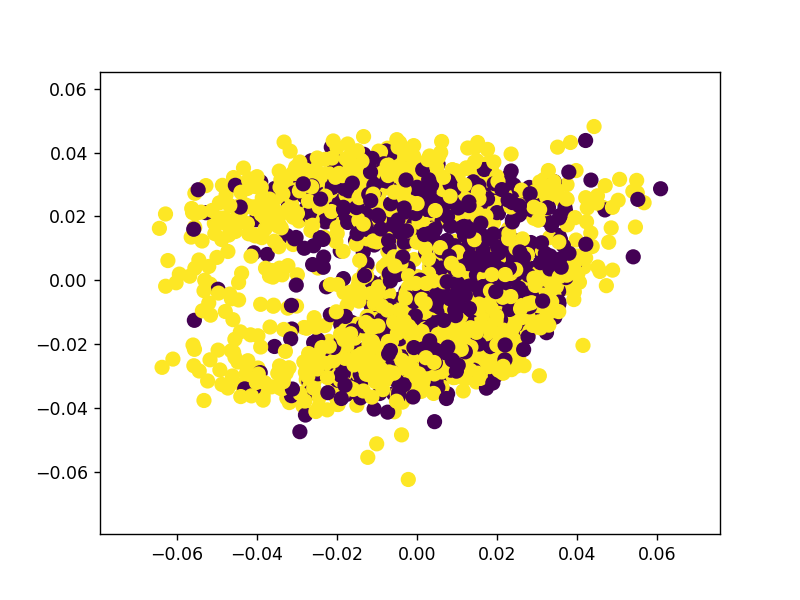

In [22]:
fig = plt.figure()
plt.scatter(ica_2d[:,0], ica_2d[:,1], c=y_h, s=60)
plt.show()

<IPython.core.display.Javascript object>


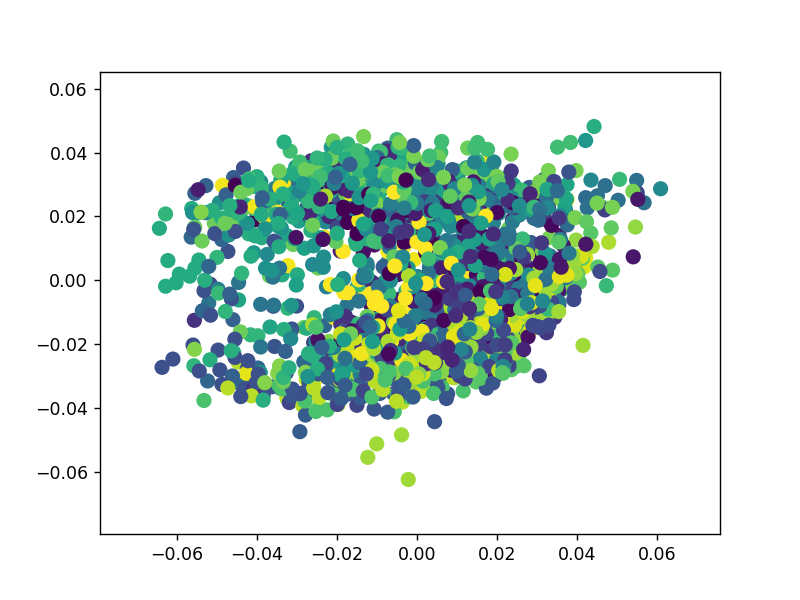

In [23]:
fig = plt.figure()
plt.scatter(ica_2d[:,0], ica_2d[:,1], c=y_l, s=60)
plt.show()

# SVD

In [24]:
from sklearn.decomposition import TruncatedSVD as SVD
svd = SVD(n_components=2).fit(X)

In [25]:
svd_2d = svd.transform(X)

<IPython.core.display.Javascript object>


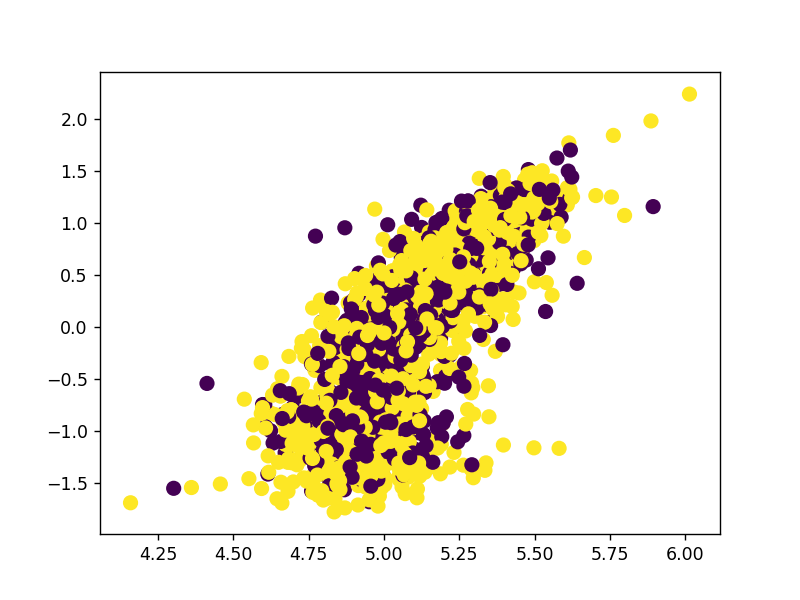

In [26]:
fig = plt.figure()
plt.scatter(svd_2d[:,0], svd_2d[:,1], c=y_h, s=60)
plt.show()

<IPython.core.display.Javascript object>


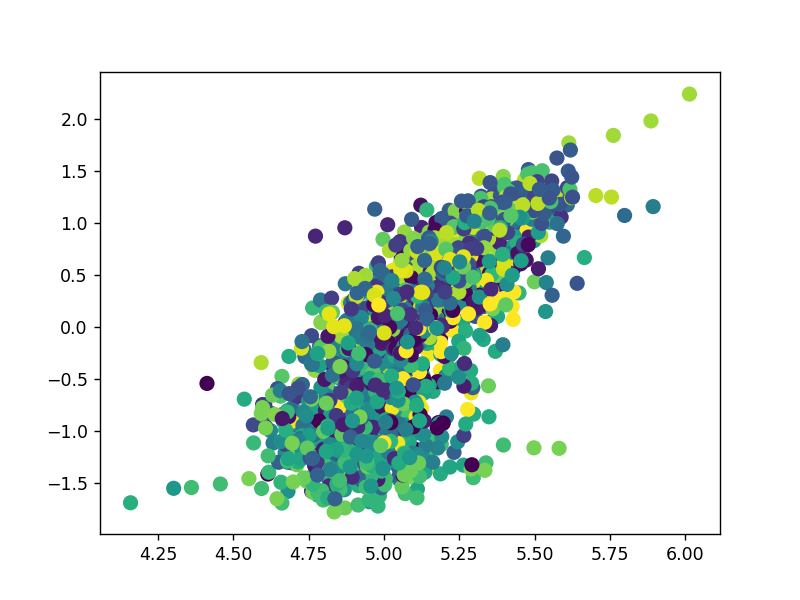

In [27]:
fig = plt.figure()
plt.scatter(svd_2d[:,0], svd_2d[:,1], c=y_l, s=60)
plt.show()

# LDA

In [28]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.preprocessing import minmax_scale
X_scale = pd.DataFrame(minmax_scale(X))
X_scale.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,0.145971,0.358000,0.241659,0.311018,0.188058,0.164762,0.112361,0.105905,0.093099,0.136718,...,0.138012,0.668099,0.199621,0.628461,0.265458,0.007793,0.009671,0.003802,0.032866,0.129780
1,0.273334,0.588058,0.463405,0.543999,0.623788,0.637511,0.608610,0.476442,0.489665,0.480908,...,0.517271,0.644286,0.506407,0.568646,0.579871,0.015438,0.009132,0.009245,0.049934,0.404170
2,0.401245,0.510012,0.624466,0.626445,0.603950,0.606666,0.523939,0.433208,0.389863,0.424412,...,0.491335,0.584962,0.562653,0.515774,0.666096,0.015277,0.012106,0.007107,0.043239,0.264639
3,0.370199,0.533236,0.582477,0.605202,0.614460,0.617079,0.479040,0.442856,0.404179,0.444656,...,0.512685,0.555342,0.514868,0.513224,0.554020,0.012918,0.013191,0.007389,0.038406,0.297578
4,0.364064,0.516165,0.587580,0.595946,0.571806,0.537272,0.466349,0.400790,0.374205,0.376965,...,0.636319,0.512443,0.563755,0.628842,0.488211,0.010563,0.008599,0.006710,0.036907,0.253877


In [29]:
lda = LDA(n_components=2).fit(X_scale)

In [30]:
lda_2d = lda.transform(X_scale)

<IPython.core.display.Javascript object>


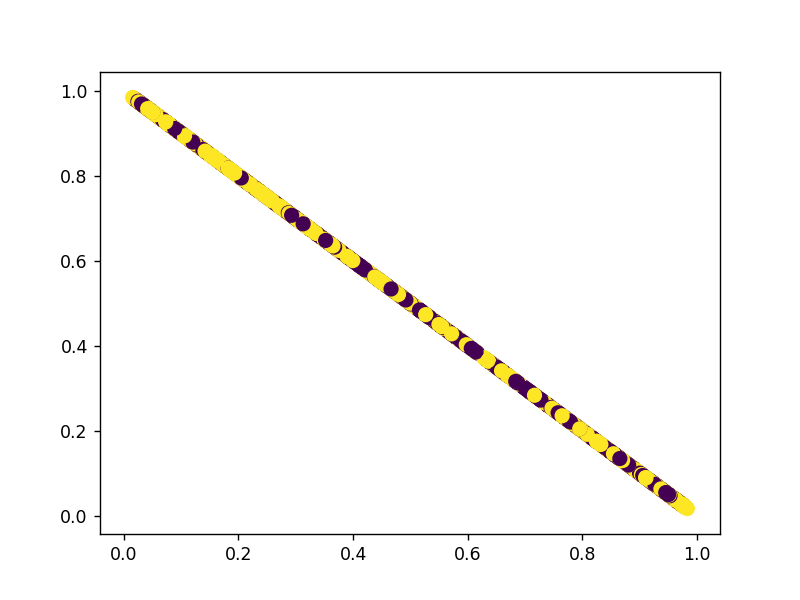

In [31]:
fig = plt.figure()
plt.scatter(lda_2d[:,0], lda_2d[:,1], c=y_h, s=60)
plt.show()

<IPython.core.display.Javascript object>


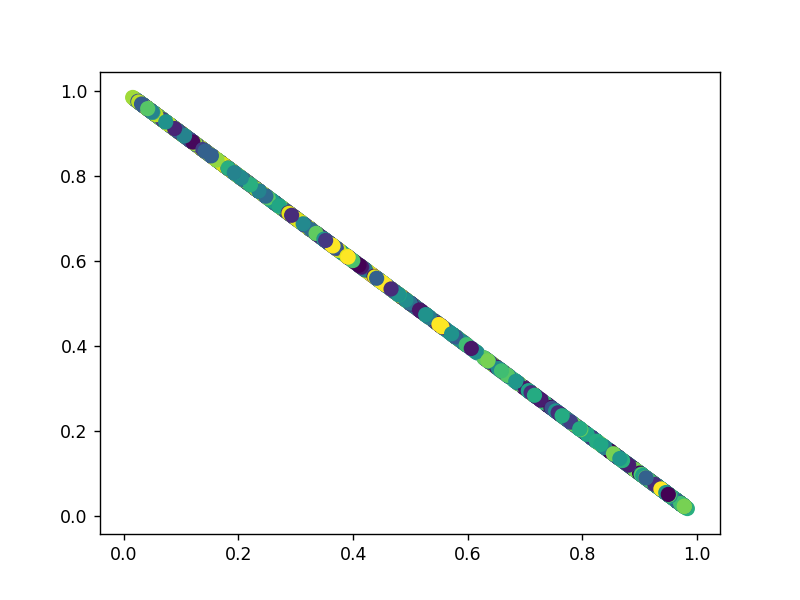

In [32]:
fig = plt.figure()
plt.scatter(lda_2d[:,0], lda_2d[:,1], c=y_l, s=60)
plt.show()